In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("abalone_data.csv") 
df_train.head()
# dobbiamo creare un modello che predica il numero di rings, dopo aver discretizzato l'attributo ring in due intervalli

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
len(df_train)

4177

In [4]:
# dobbiamo scartare gli infanti
df_train = df_train[df_train['sex'] != 'I']

len(df_train)

2835

In [5]:
# Get the unique values of sex
sexes = sorted(df_train['sex'].unique())
    
# Generate a mapping of sex from a string to a number representation    
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

# Transform Sex from a string to a number representation
df_train['sex_val'] = df_train['sex'].map(genders_mapping).astype(int)

# Drop the coloumn sex
df_train = df_train.drop(['sex'], axis=1)


df_train.head()

# F = 0, M = 1

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_val
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0


In [6]:
df_train['rings'].describe()

count    2835.000000
mean       10.900882
std         3.069252
min         3.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        29.000000
Name: rings, dtype: float64

(array([   3.,    6.,   15.,   43.,  124.,  294.,  516.,  542.,  425.,
         246.,  179.,  112.,   93.,   60.,   51.,   37.,   30.,   24.,
          13.,    6.,    9.,    2.,    1.,    1.,    2.,    1.]),
 array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.]),
 <a list of 26 Patch objects>)

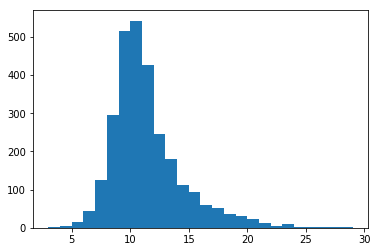

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df_train['rings'], bins=len(df_train['rings'].unique()))

In [8]:
# discretizzazione dell'attributo rings
med = df_train['rings'].median()        # utilizziamo dapprima la mediana

# Generate a mapping of rings, 1 if rings > median    
def rings_mapping(x):
    if x > med:
        return 1
    return 0

# Transform rings from an integer to a 0-1 representation
df_train['class'] = df_train['rings'].map(rings_mapping).astype(int)

# Drop the coloumn rings
df_train = df_train.drop(['rings'], axis=1)

df_train.head()

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_val,class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,0,1


In [9]:
# Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[ 0.455,  0.365,  0.095, ...,  0.15 ,  1.   ,  1.   ],
       [ 0.35 ,  0.265,  0.09 , ...,  0.07 ,  1.   ,  0.   ],
       [ 0.53 ,  0.42 ,  0.135, ...,  0.21 ,  0.   ,  0.   ],
       ..., 
       [ 0.6  ,  0.475,  0.205, ...,  0.308,  1.   ,  0.   ],
       [ 0.625,  0.485,  0.15 , ...,  0.296,  0.   ,  0.   ],
       [ 0.71 ,  0.555,  0.195, ...,  0.495,  1.   ,  1.   ]])

In [10]:
# Training data features, skip the last column 'class'
train_features = train_data[:, :len(train_data[0])-1]

# 'class' column values
train_target = train_data[:, len(train_data[0])-1]

In [11]:
# FINE PREPARAZIONE DATASET

Wall time: 2min 58s


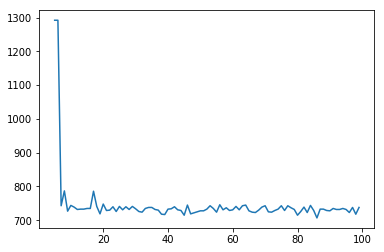

In [12]:
%%time

import numpy as np

#
# Neural Networks
#
# RICORDA
# train_data = df_train.values
# train_features = train_data[:, :len(train_data[0])-1]
# train_target = train_data[:, len(train_data[0])-1]

from sklearn.neural_network import MLPClassifier
i_ideale = 0
err_min = 10000000
error_list = list()
for i in range(5,100):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, i//2), random_state=1)
        clf.fit(train_features, train_target)       
        error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
        error_list.append(error)
    
        if (error < err_min):
            i_ideale = i
            err_min = error
    
plt.plot(range(5,100), error_list)

Wall time: 5min 18s


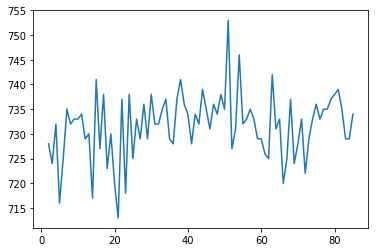

In [13]:
%%time

j_ideale = 0
err_min = 10000000
error_list = list()
for j in range(2,i_ideale):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1)
        clf.fit(train_features, train_target)       
        error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
        error_list.append(error)
    
        if (error < err_min):
            j_ideale = j
            err_min = error
    
plt.plot(range(2,i_ideale), error_list)

In [14]:
print("layer 1:", i_ideale, "layer 2:", j_ideale)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i_ideale, j_ideale), random_state=1)
clf.fit(train_features, train_target)       
error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
errorRate = error/len(df_train)
print ("error:", error, "\terror rate:", errorRate)

# quindi usando metodi abbastanza casuali ottengo due hidden layers, di dim 86 e 21
# credo sia abbastanza overfitting comunque

layer 1: 86 layer 2: 21
error: 729.0 	error rate: 0.257142857143


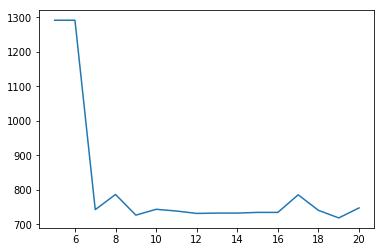

In [15]:
# II prova metodi casuali

i_ideale = 0
err_min = 10000000
error_list = list()
for i in range(5,21):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, i//2), random_state=1)
        clf.fit(train_features, train_target)       
        error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
        error_list.append(error)
    
        if (error < err_min):
            i_ideale = i
            err_min = error
    
plt.plot(range(5,21), error_list)

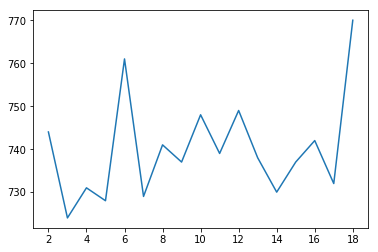

In [16]:
j_ideale = 0
err_min = 10000000
error_list = list()
for j in range(2,i_ideale):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1)
        clf.fit(train_features, train_target)       
        error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
        error_list.append(error)
    
        if (error < err_min):
            j_ideale = j
            err_min = error
    
plt.plot(range(2,i_ideale), error_list)

In [17]:
print("layer 1:", i_ideale, "layer 2:", j_ideale)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i_ideale, j_ideale), random_state=1)
clf.fit(train_features, train_target)       
error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
errorRate = error/len(df_train)
print ("error:", error, "\terror rate:", errorRate)

# ottengo sempre due layer, dimensioni 19 e 3, a discapito di un errore maggiore, ma di pochissimo

layer 1: 19 layer 2: 3
error: 734.0 	error rate: 0.258906525573


In [18]:
# weights of the network
clf.coefs_

[array([[ -7.82319879e-02,  -2.76859890e-01,  -3.64044996e-01,
          -7.25023132e-01,  -2.94220367e-01,  -7.59827926e-01,
           1.67137239e-02,  -4.45891721e-01,  -9.73280407e-02,
           4.21485820e-01,  -1.81475361e-01,   4.65329955e-01,
          -2.78643608e-01,   3.17651968e-01,  -4.45580879e-01,
           1.33772650e-01,   1.36657990e-01,  -2.05161947e-01,
          -5.87631866e-01],
        [ -2.84631131e-01,  -8.68280443e-02,   7.88070730e-01,
          -6.87031027e-01,   2.44499675e-01,   1.06151929e-01,
          -7.57578586e-01,  -6.37029838e-01,  -4.34581005e-01,
          -1.27574198e-01,   2.75476334e-01,  -5.12627537e-01,
          -7.43800486e-02,   4.97344604e-01,   3.12683641e-02,
           1.60282349e-01,   5.73432035e-01,  -2.29614584e-02,
           9.93735023e-02],
        [ -4.54159751e-01,   1.01037914e-01,   5.45108566e-01,
           1.31149617e-01,  -4.96698676e-01,   2.23654308e-01,
          -1.97459038e-01,  -1.50576972e-01,   3.85225485e-01,

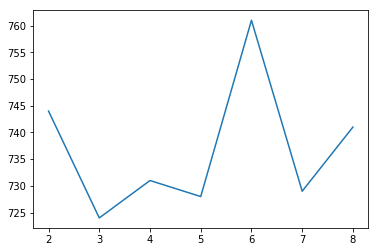

In [19]:
# proviamo con i = 9
i_ideale = 9
j_ideale = 0
err_min = 10000000
error_list = list()
for j in range(2,i_ideale):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1)
        clf.fit(train_features, train_target)       
        error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
        error_list.append(error)
    
        if (error < err_min):
            j_ideale = j
            err_min = error
    
plt.plot(range(2,i_ideale), error_list)

In [20]:
print("layer 1:", i_ideale, "layer 2:", j_ideale)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i_ideale, j_ideale), random_state=1)
clf.fit(train_features, train_target)       
error = sum(abs(np.array(clf.predict(train_features)) - np.array(train_target)))
errorRate = error/len(df_train)
print ("error:", error, "\terror rate:", errorRate)

# due hidden layer, dim 9 e 3, errori praticamente uguali a prima

layer 1: 9 layer 2: 3
error: 739.0 	error rate: 0.260670194004


In [21]:
# Cerchiamo i parametri migliori con il metodo del prof

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [22]:
from random import randint

clf = MLPClassifier(solver='lbfgs')

param_dist = {'hidden_layer_sizes': [(randint(1,100), randint(1,100)) for _ in range(20)]
             }

n_iter_search = len(param_dist["hidden_layer_sizes"])

search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [ ]:
search.fit(train_features, train_target)

report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]


Model with rank: 1
Mean validation score: 0.739 (std: 0.024)
Parameters: {'hidden_layer_sizes': (8, 50)}

Model with rank: 2
Mean validation score: 0.737 (std: 0.022)
Parameters: {'hidden_layer_sizes': (9, 60)}

Model with rank: 3
Mean validation score: 0.736 (std: 0.019)
Parameters: {'hidden_layer_sizes': (76, 9)}



In [ ]:
# Proviamo con grid search invece che randomized search
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(randint(1,500), randint(1,500)) for _ in range(20)]
             }

n_iter_search = len(param_dist["hidden_layer_sizes"])

search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
search.fit(train_features, train_target)
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

# come sopra